In [3]:
import tensorflow as tf

x = tf.ones(shape=(2, 1))
print(x)

x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [4]:
import tensorflow as tf

# 정규 분포(normal distribution)
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

# 균등 분포(uniform distribution)
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[ 1.7185954 ]
 [-0.0818589 ]
 [-0.22567731]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.7374253 ]
 [0.80511487]
 [0.73029053]], shape=(3, 1), dtype=float32)


In [5]:
import numpy as np

x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [6]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [10]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.42549193],
       [-1.4535228 ],
       [-1.6798015 ]], dtype=float32)>


In [12]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [13]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [14]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [16]:
a = tf.ones((2, 2))
b = tf.square(a)        # 제곱
c = tf.sqrt(a)          # 제곱근
d = b + c               # 두 텐서의 합(원소별 연산)
e = tf.matmul(a, b)     # 두 텐서의 점곱
e *= d                  # 두 텐서의 곱(원소별 연산)

In [17]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [19]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [21]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [23]:
num_samples_per_class = 1000
# 왼쪽 아래에서 오른쪽 위로 향하는 타원형의 포인트 클라우드에 첫 번째 클래스의 포인트 1,000개 생성
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
# 동일한 공분산 행렬에 다른 평균을 사용하여 다른 클래스의 포인트 생성
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

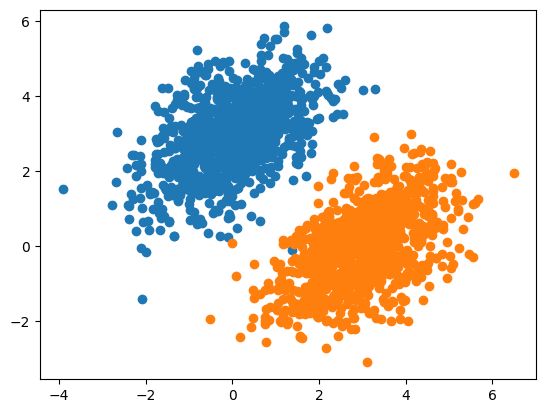

In [33]:
import matplotlib.pyplot as plt

plt.scatter(x=negative_samples[:, 0], y=negative_samples[:, 1])
plt.scatter(x=positive_samples[:, 0], y=positive_samples[:, 1])
plt.show()

In [34]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [35]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

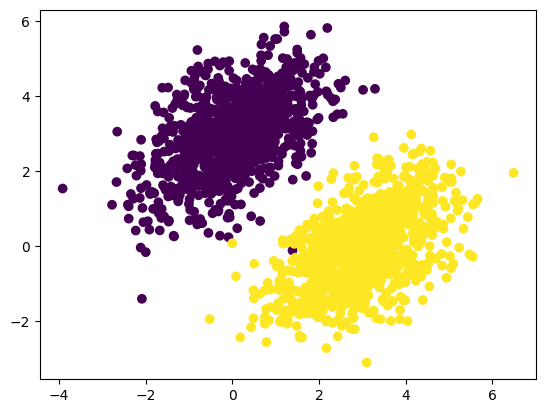

In [36]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [37]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

In [38]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [39]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [40]:
learning_rate = 0.1

def training_step(inputs, targets):
    # 정방향 패스
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    # 가중치에 대한 손실의 그레이디언트 계산
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # 가중치 업데이트
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    
    return loss

In [41]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 3.1373
1번째 스텝의 손실: 0.4681
2번째 스텝의 손실: 0.1736
3번째 스텝의 손실: 0.1326
4번째 스텝의 손실: 0.1198
5번째 스텝의 손실: 0.1108
6번째 스텝의 손실: 0.1029
7번째 스텝의 손실: 0.0958
8번째 스텝의 손실: 0.0894
9번째 스텝의 손실: 0.0835
10번째 스텝의 손실: 0.0782
11번째 스텝의 손실: 0.0734
12번째 스텝의 손실: 0.0690
13번째 스텝의 손실: 0.0650
14번째 스텝의 손실: 0.0614
15번째 스텝의 손실: 0.0581
16번째 스텝의 손실: 0.0551
17번째 스텝의 손실: 0.0524
18번째 스텝의 손실: 0.0499
19번째 스텝의 손실: 0.0477
20번째 스텝의 손실: 0.0457
21번째 스텝의 손실: 0.0438
22번째 스텝의 손실: 0.0422
23번째 스텝의 손실: 0.0407
24번째 스텝의 손실: 0.0393
25번째 스텝의 손실: 0.0380
26번째 스텝의 손실: 0.0369
27번째 스텝의 손실: 0.0359
28번째 스텝의 손실: 0.0349
29번째 스텝의 손실: 0.0341
30번째 스텝의 손실: 0.0333
31번째 스텝의 손실: 0.0326
32번째 스텝의 손실: 0.0320
33번째 스텝의 손실: 0.0314
34번째 스텝의 손실: 0.0309
35번째 스텝의 손실: 0.0304
36번째 스텝의 손실: 0.0299
37번째 스텝의 손실: 0.0296
38번째 스텝의 손실: 0.0292
39번째 스텝의 손실: 0.0289


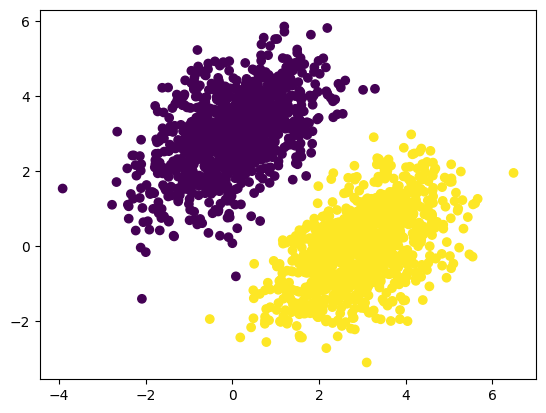

In [42]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

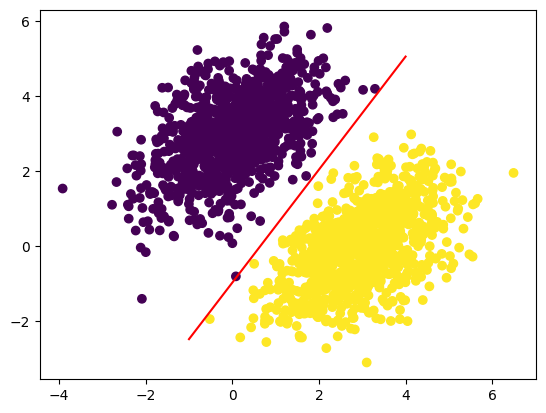

In [43]:
import numpy as np

x = np.linspace(-1, 4, 1000)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()